In [2]:
from availability_estimation import *
from ..Roma import graphbuilder_v2
import ast

/Users/polina/Desktop/github/transport_frames/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Связность между адм. центрами ЛО 

In [44]:
lo_polygon = ox.geocode_to_gdf('R176095', by_osmid=True).to_crs(epsg=32636)
spb_polygon = ox.geocode_to_gdf('R337422', by_osmid=True).to_crs(epsg=32636).buffer(3000)
city = lo_polygon.union(spb_polygon).to_crs(epsg=4326)
citygraph = graphbuilder_v2.get_graph_from_polygon(city, crs=32636)

# citygraph = nx.read_graphml('/Users/polina/Desktop/don/graphmls/uds_graph_with_reg.graphml')

citygraph = prepare_graph(citygraph)
city_points = gpd.read_file("/Users/polina/Desktop/don/gdfs/admin_centers_LO_188_points.geojson") 
polygons_gpsp = gpd.read_file('lo_gdfs/polygons188.geojson')
polygons_mo= gpd.read_file('lo_gdfs/polygons18.geojson')

In [45]:
adj_mx = availability_matrix(citygraph,city_points)
p = find_median(city_points,adj_mx)

05-21 16:52 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:52 | INFO     | Adjacency matrix done!


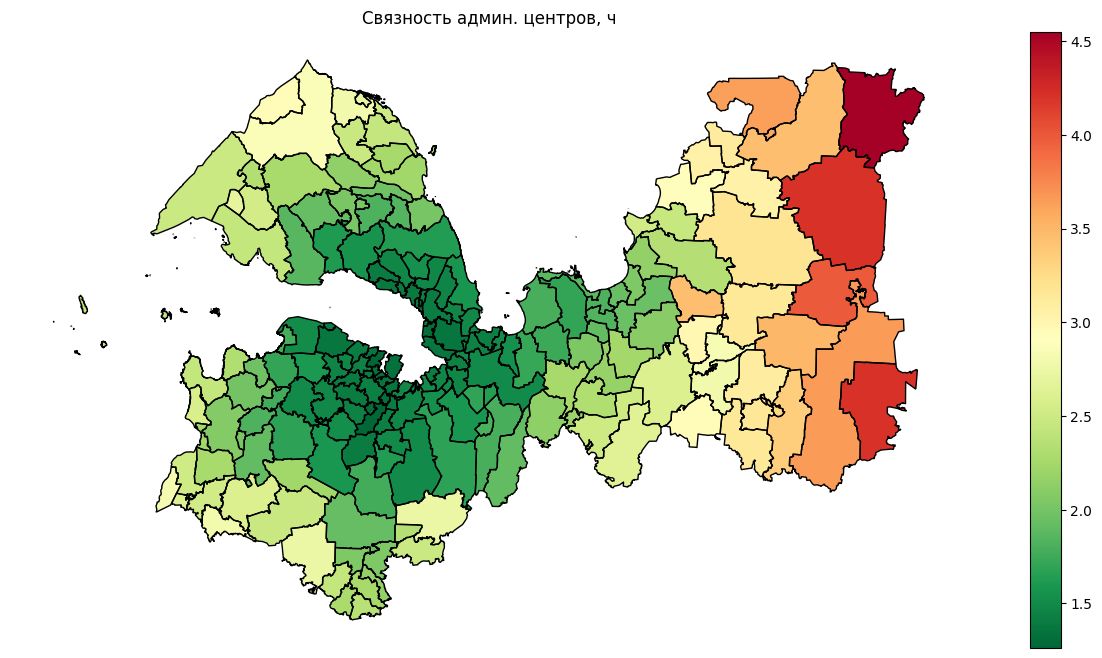

In [47]:
visualize_availability(p,polygons_gpsp,title='Связность админ. центров, ч')

# Доступность сервисов в ЛО

In [3]:
lo_polygon = ox.geocode_to_gdf('R176095', by_osmid=True).to_crs(epsg=32636)
spb_polygon = ox.geocode_to_gdf('R337422', by_osmid=True).to_crs(epsg=32636).buffer(3000)
city = lo_polygon.union(spb_polygon).to_crs(epsg=4326)
citygraph = graphbuilder_v2.get_graph_from_polygon(city, crs=32636)

citygraph = prepare_graph(citygraph)
city_points = gpd.read_file('lo_gdfs/points.geojson')
polygons_gpsp = gpd.read_file('lo_gdfs/polygons188.geojson')
polygons_mo= gpd.read_file('lo_gdfs/polygons18.geojson')

/Users/polina/Desktop/github/transport_frames/.venv/lib/python3.10/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 52 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/polina/Desktop/github/transport_frames/Polina/graphbuilder_v2.py:492: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  edges = edges.explode()


In [4]:
# AVAILABLE SERVICES

stops = gpd.read_file('/Users/polina/Desktop/don/gdfs/ЖД остановки.geojson')

fuel = gpd.read_file('/Users/polina/Desktop/don/gdfs/fuel.geojson')

spb = ox.geocode_to_gdf('N27490597', by_osmid=True)  # СПб

ferry = gpd.read_file('/Users/polina/Desktop/don/gdfs/water_transport_LO.geojson')

aero = gpd.read_file('/Users/polina/Desktop/don/gdfs/airports_local_LO.geojson')

## Доступность ЖД остановок

In [25]:
adj_mx = availability_matrix(citygraph,city_points, stops)
p = find_nearest(city_points,adj_mx)

05-21 16:42 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:43 | INFO     | Adjacency matrix done!


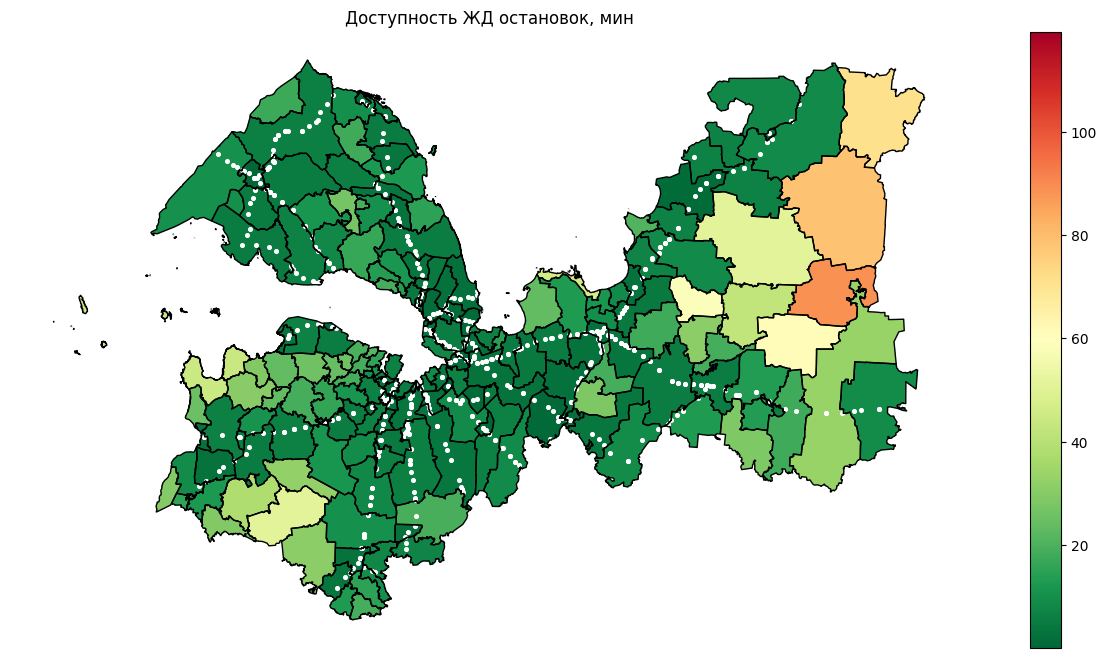

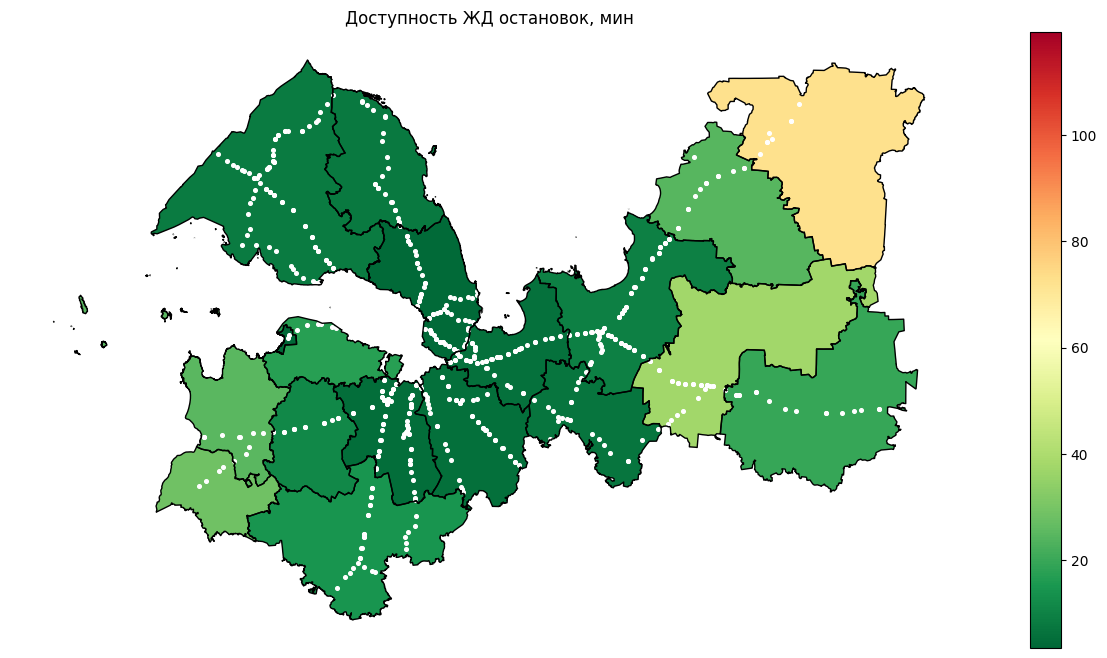

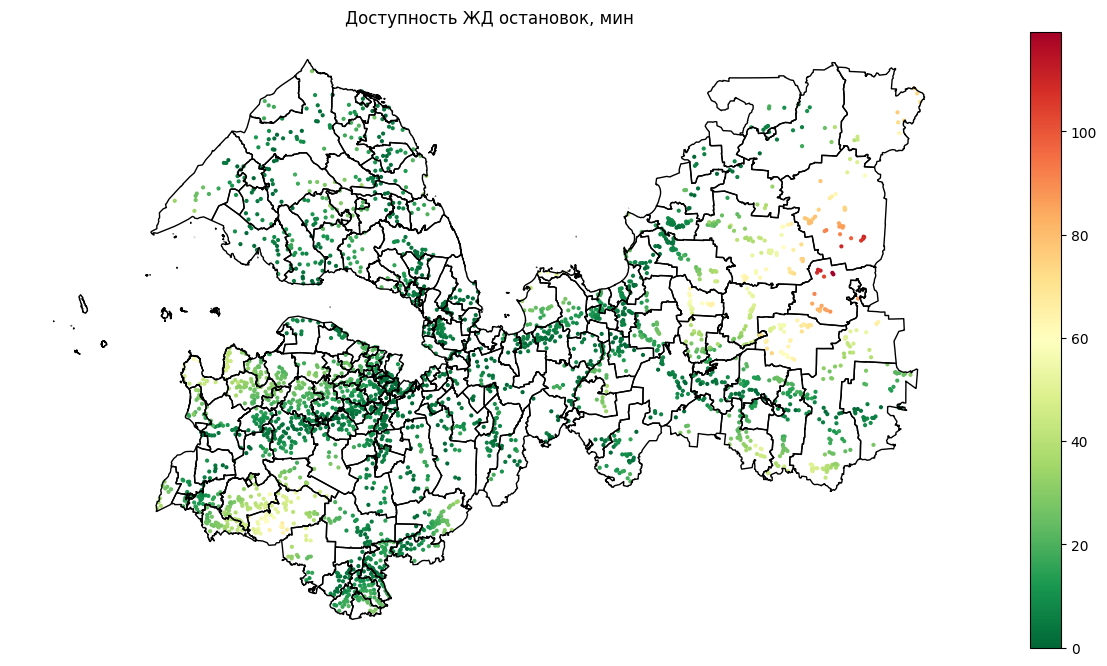

In [26]:
visualize_availability(p,polygons_gpsp,title='Доступность ЖД остановок, мин',service_gdf=stops)
visualize_availability(p,polygons_mo,title='Доступность ЖД остановок, мин',service_gdf=stops)
visualize_availability(p,polygons_gpsp,title='Доступность ЖД остановок, мин',median=False)

## Доступность АЗС

In [33]:
adj_mx = availability_matrix(citygraph,city_points, fuel)
p = find_nearest(city_points,adj_mx)

05-21 16:45 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:45 | INFO     | Adjacency matrix done!
Some services cannot be reached, they were removed


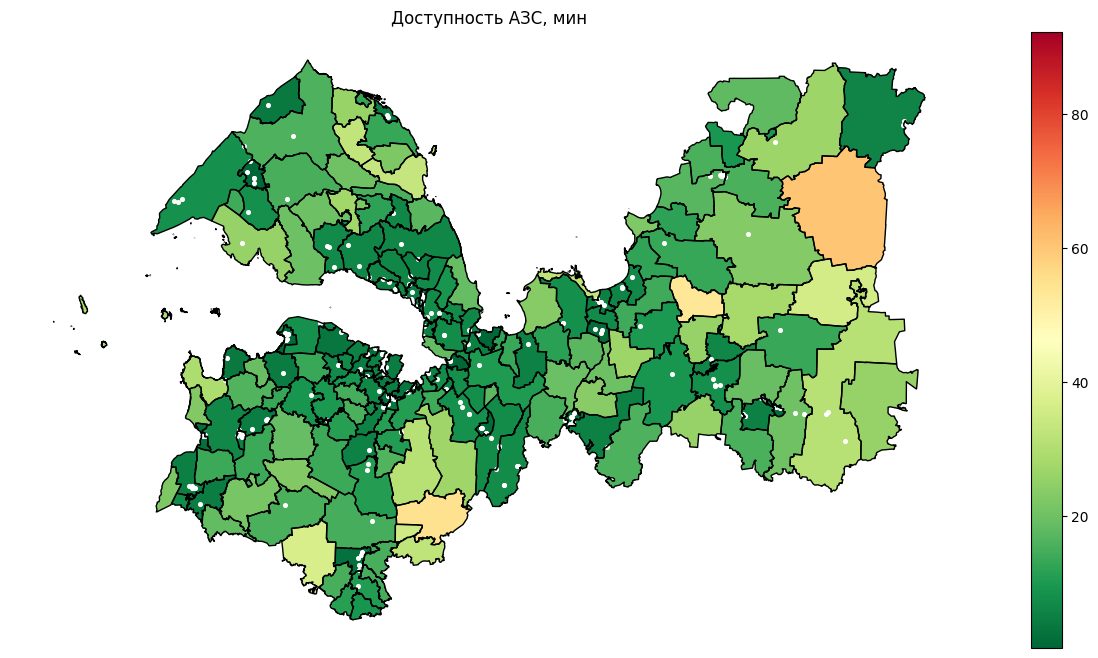

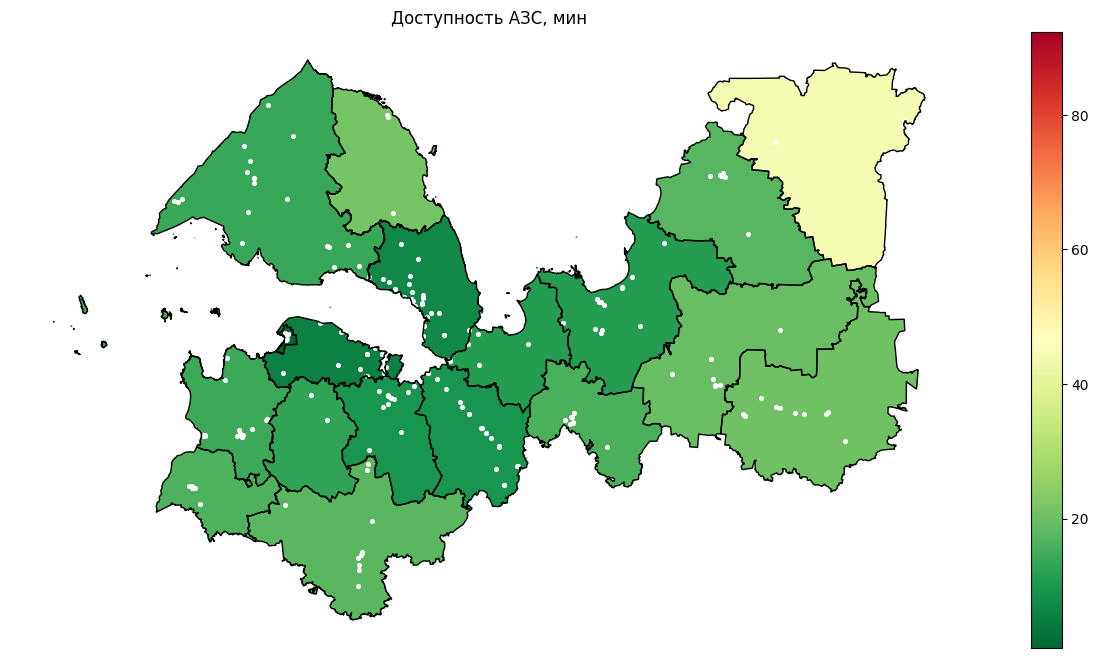

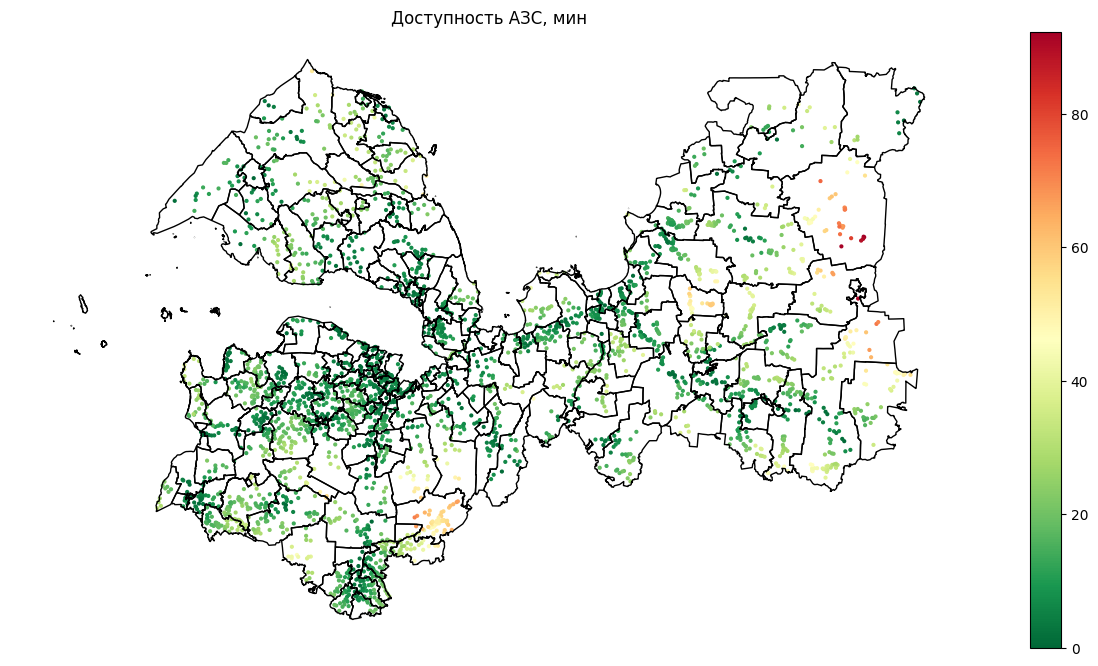

In [34]:
visualize_availability(p,polygons_gpsp,title='Доступность АЗС, мин',service_gdf=fuel)
visualize_availability(p,polygons_mo,title='Доступность АЗС, мин',service_gdf=fuel)
visualize_availability(p,polygons_gpsp,title='Доступность АЗС, мин',median=False)

## Доступность объектов водного траснпорта

In [35]:
adj_mx = availability_matrix(citygraph,city_points, ferry)
p = find_nearest(city_points,adj_mx)

05-21 16:46 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:46 | INFO     | Adjacency matrix done!
Some services cannot be reached, they were removed


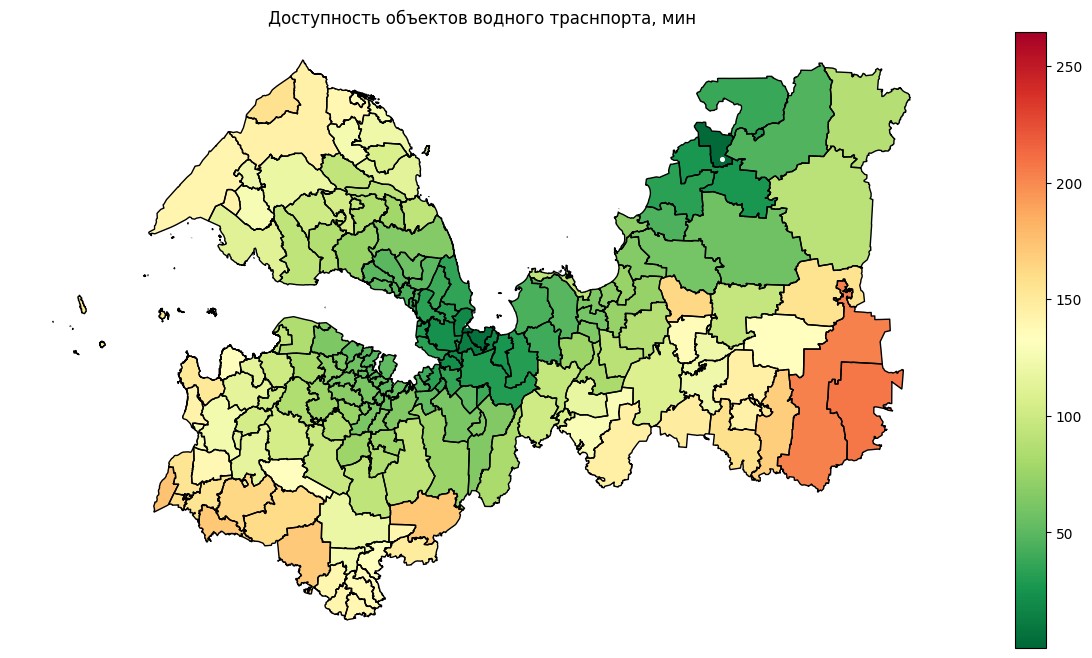

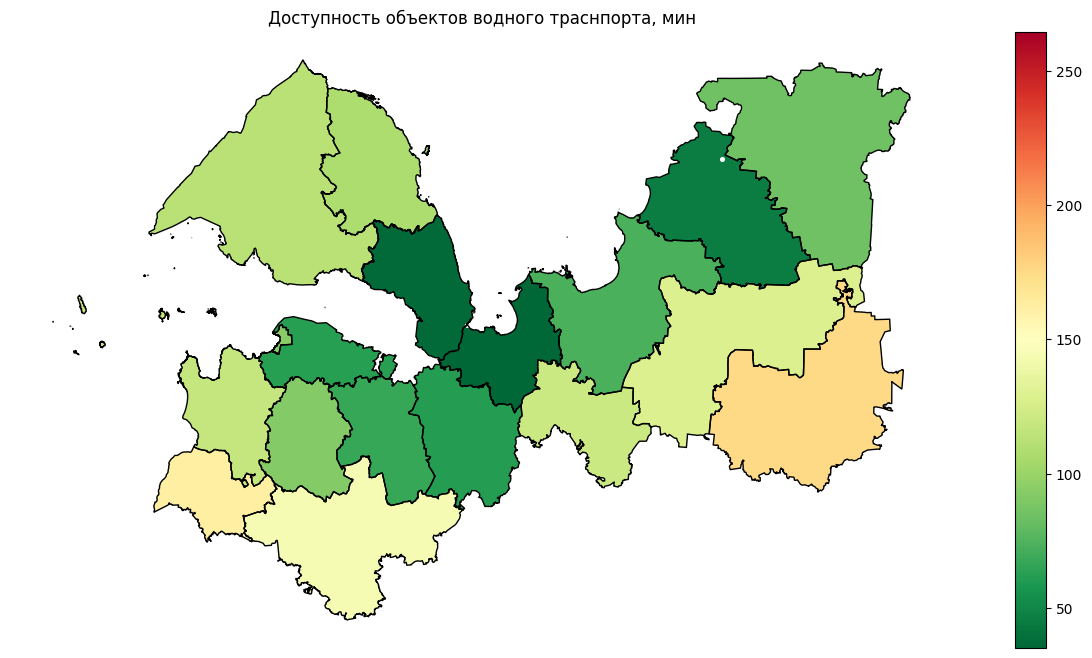

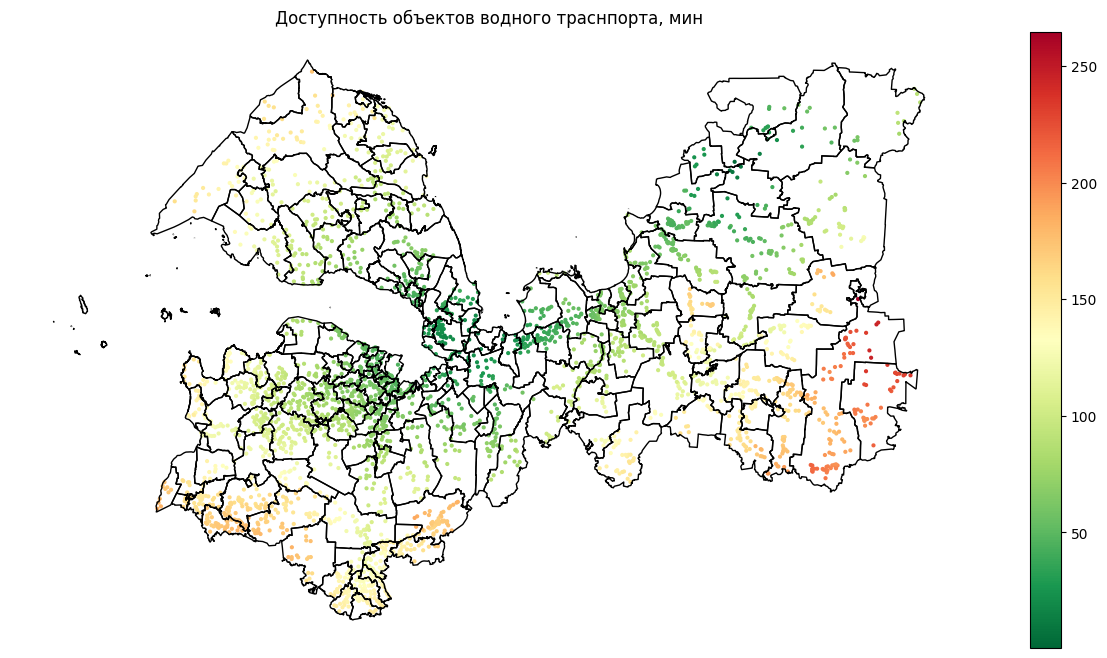

In [36]:
visualize_availability(p,polygons_gpsp,title='Доступность объектов водного траснпорта, мин',service_gdf=ferry)
visualize_availability(p,polygons_mo,title='Доступность объектов водного траснпорта, мин',service_gdf=ferry)
visualize_availability(p,polygons_gpsp,title='Доступность объектов водного траснпорта, мин',median=False)

## Доступность аэропортов

In [37]:
adj_mx = availability_matrix(citygraph,city_points, aero)
p = find_nearest(city_points,adj_mx)

05-21 16:46 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:46 | INFO     | Adjacency matrix done!
Some services cannot be reached, they were removed


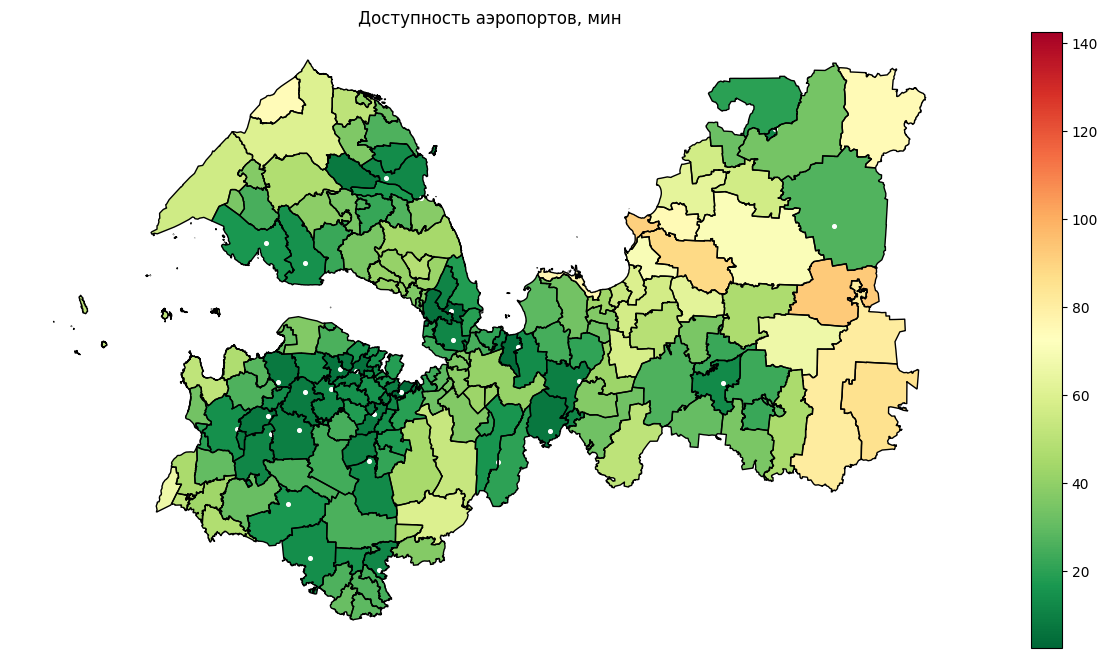

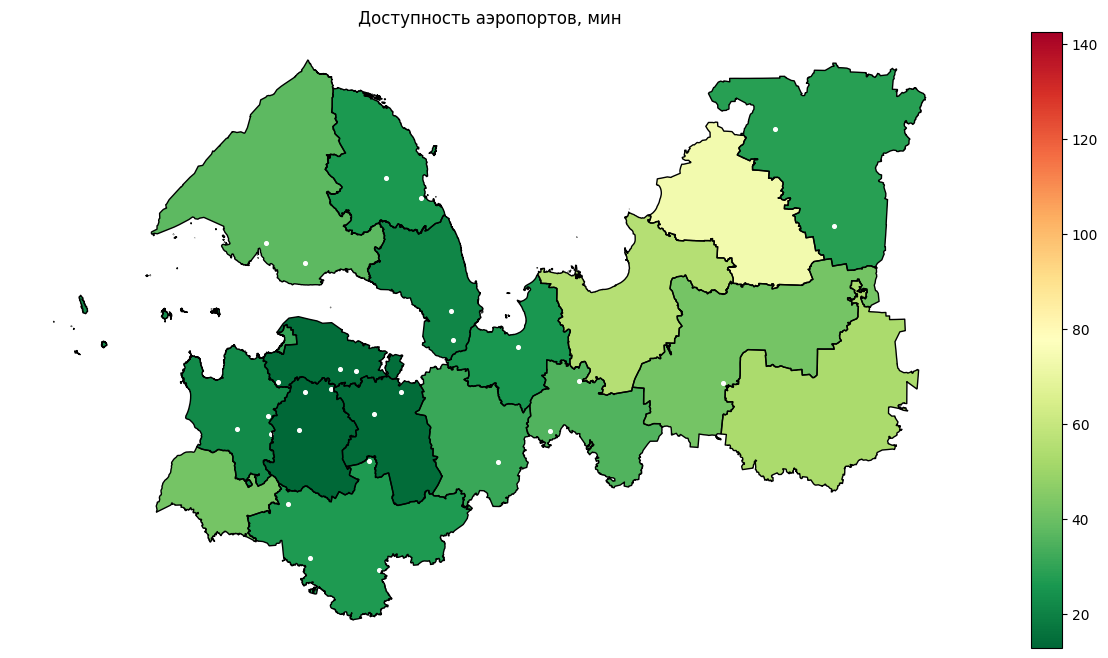

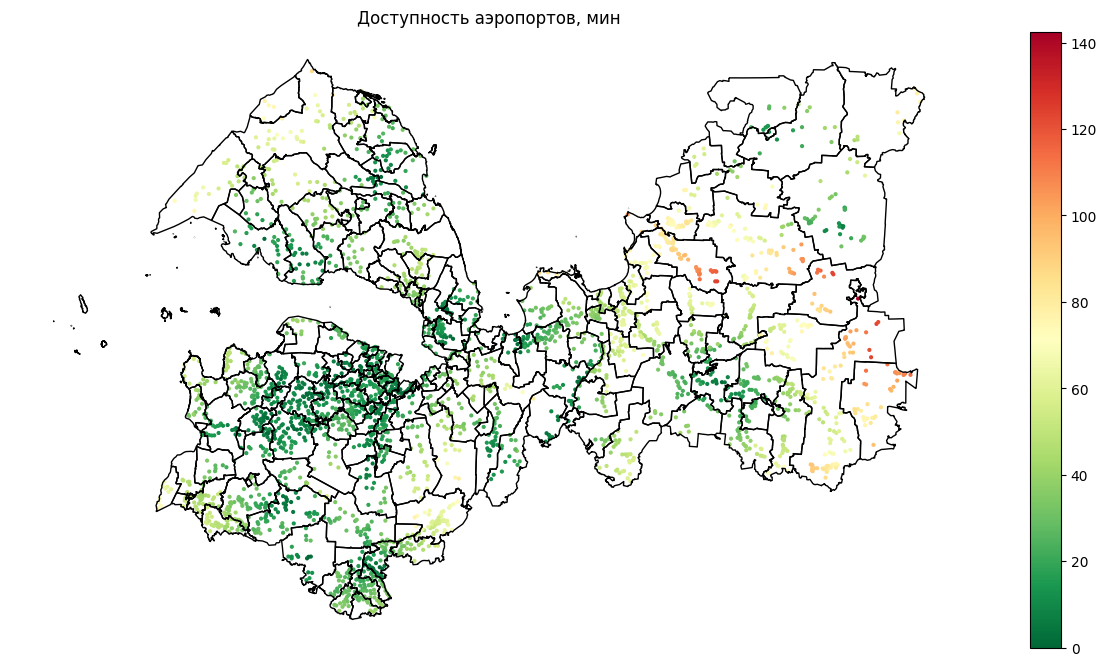

In [38]:
visualize_availability(p,polygons_gpsp,title='Доступность аэропортов, мин',service_gdf=aero)
visualize_availability(p,polygons_mo,title='Доступность аэропортов, мин',service_gdf=aero)
visualize_availability(p,polygons_gpsp,title='Доступность аэропортов, мин',median=False)

## Доступность федеральных трасс

In [39]:
def get_reg(graph,reg):
    n= momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)
    return n[n[f'reg_{reg}']==True]

In [40]:
reg1 = get_reg(citygraph,1)
adj_mx = availability_matrix(citygraph,city_points, reg1)
p = find_nearest(city_points,adj_mx)

05-21 16:47 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:50 | INFO     | Adjacency matrix done!
Some services cannot be reached, they were removed


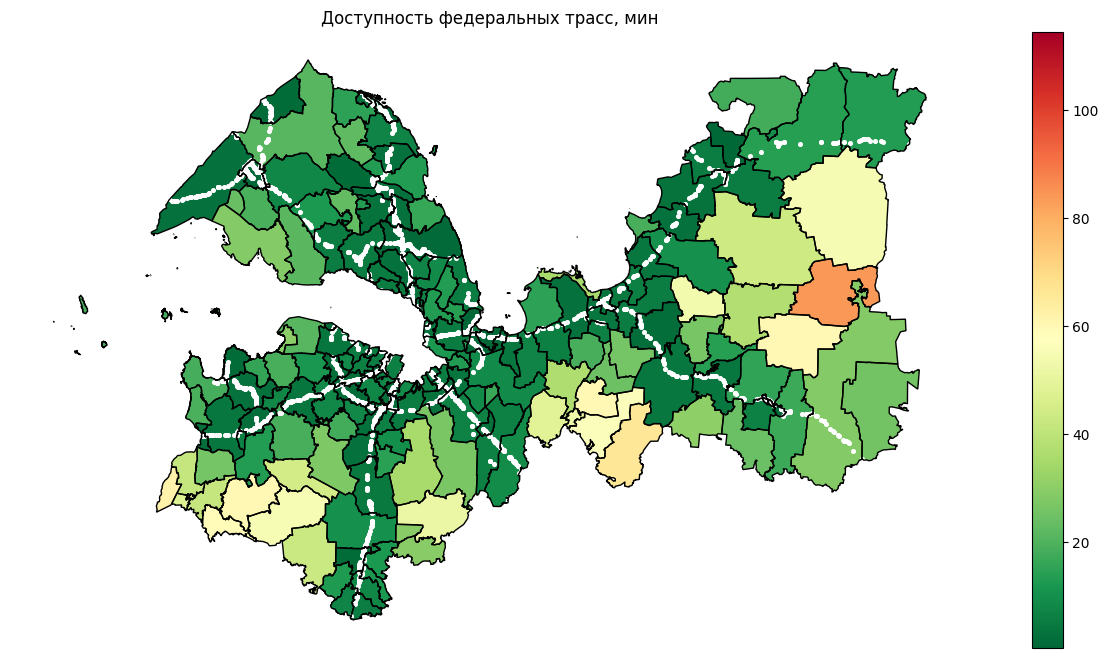

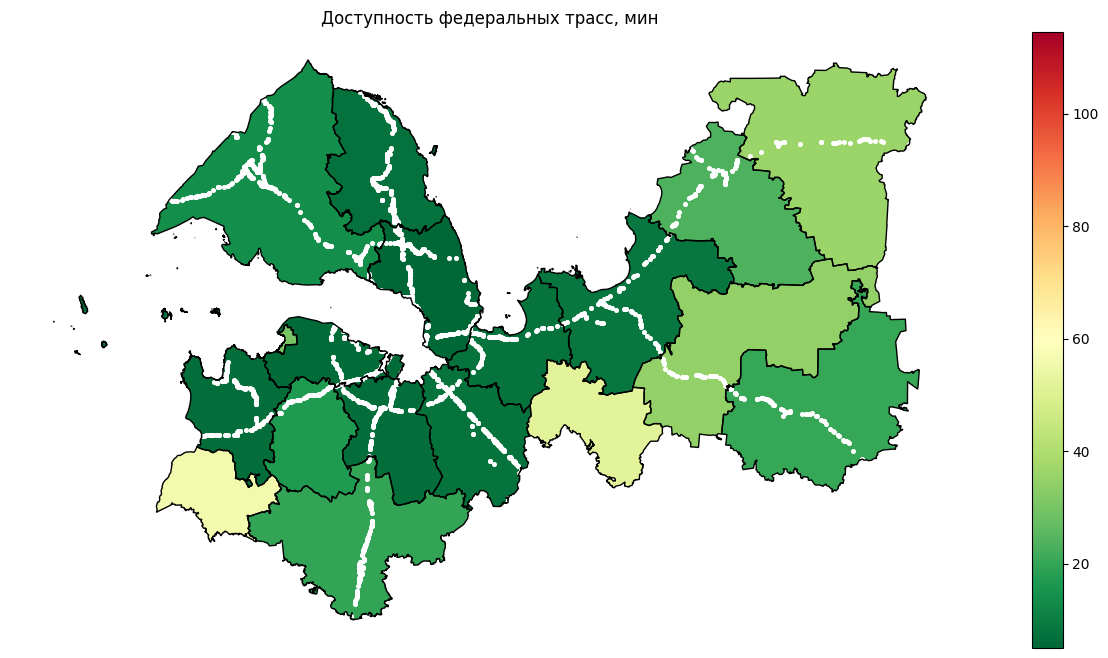

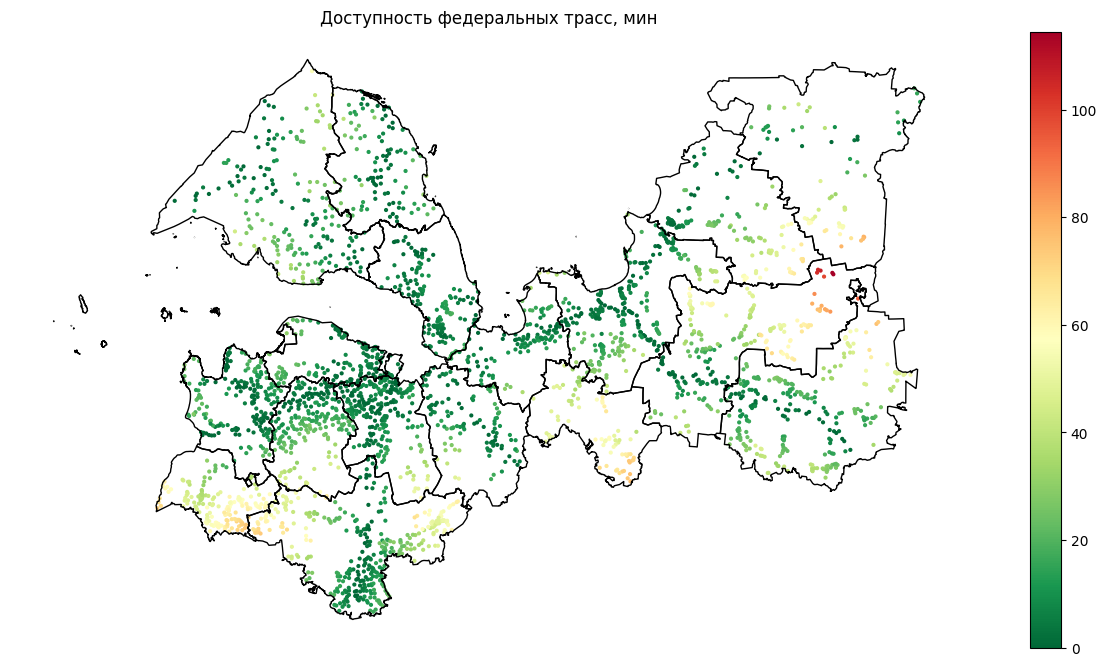

In [41]:
visualize_availability(p,polygons_gpsp,title='Доступность федеральных трасс, мин',service_gdf=reg1)
visualize_availability(p,polygons_mo,title='Доступность федеральных трасс, мин',service_gdf=reg1)
visualize_availability(p,polygons_mo,title='Доступность федеральных трасс, мин',median=False)

## Удаленность от СПБ

In [42]:
adj_mx = availability_matrix(citygraph,city_points, spb, weight='length_meter')
p = find_nearest(city_points,adj_mx)
p['to_service'] = p['to_service']/1000

05-21 16:50 | INFO     | Creating adjacency matrix based on provided graph...
05-21 16:51 | INFO     | Adjacency matrix done!
Some services cannot be reached, they were removed


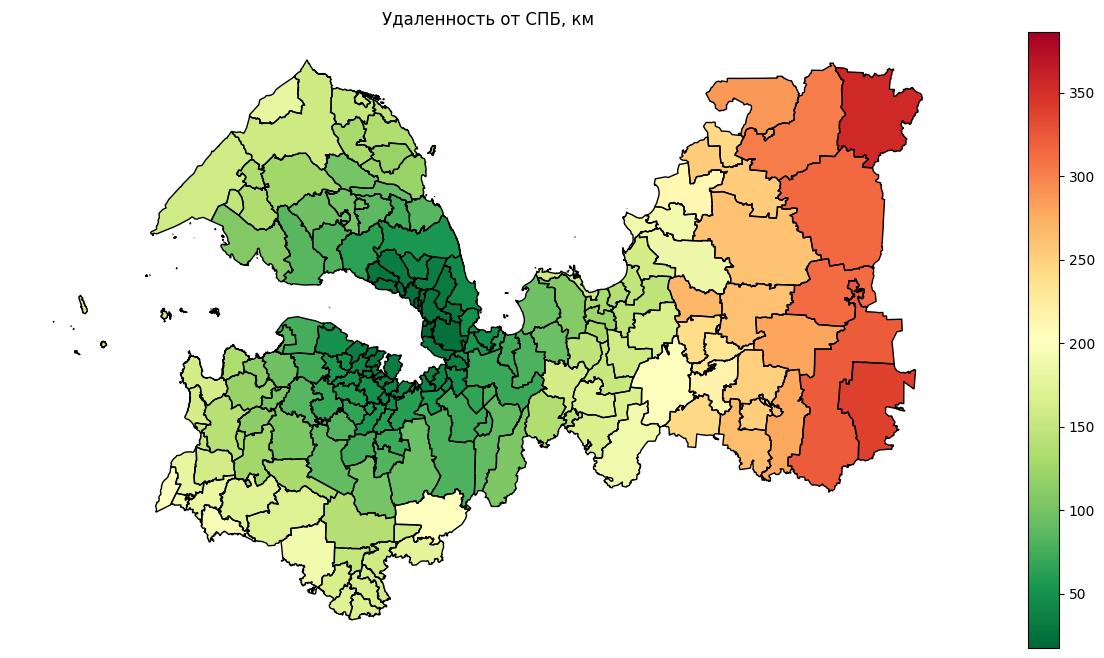

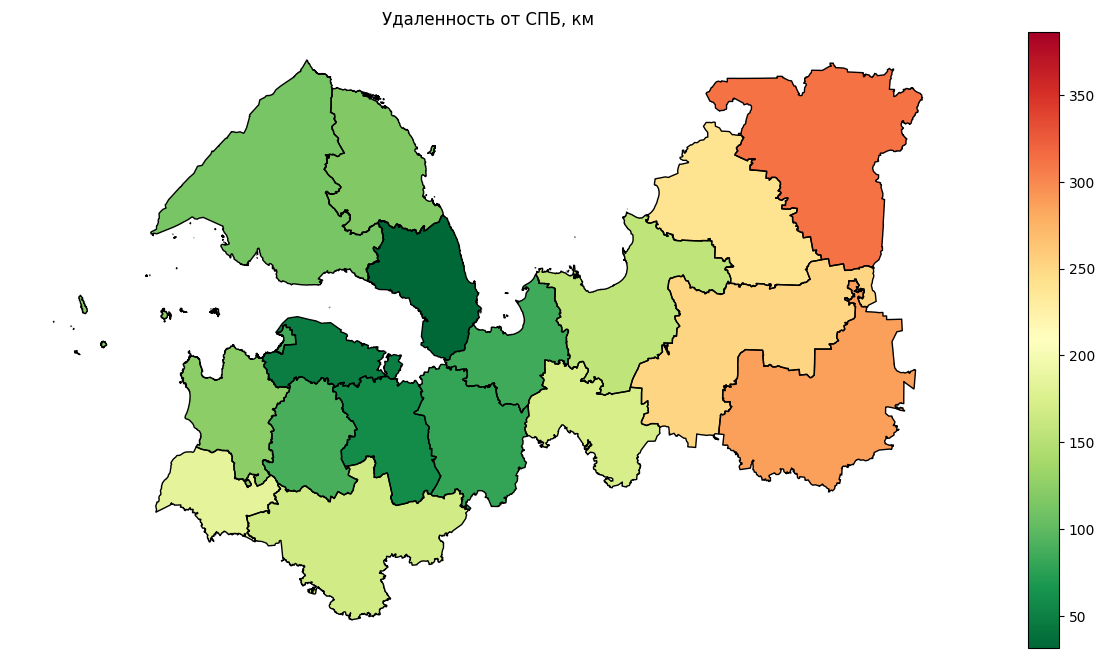

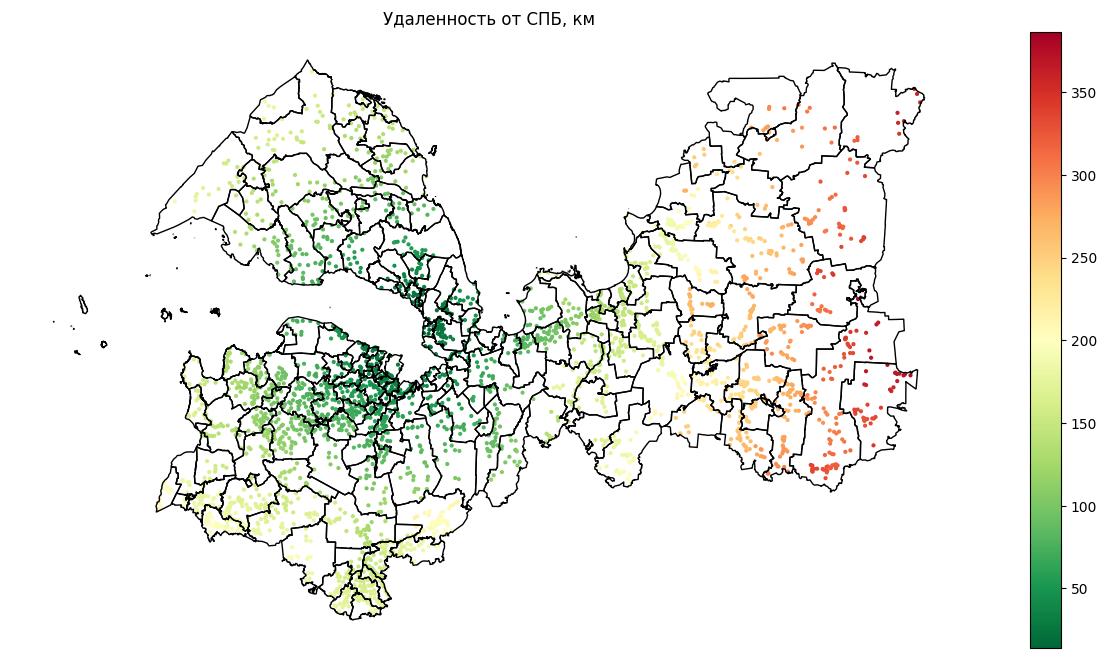

In [43]:
visualize_availability(p,polygons_gpsp,title='Удаленность от СПБ, км',service_gdf=spb)
visualize_availability(p,polygons_mo,title='Удаленность от СПБ, км',service_gdf=spb)
visualize_availability(p,polygons_gpsp,title='Удаленность от СПБ, км',median=False)

# Заправки Вологодской области

## Граф УДС

In [49]:
def prepare_graph(graph_orig):
    # Convert node labels to integers
    graph_int = nx.convert_node_labels_to_integers(graph_orig, first_label=0, ordering='default', label_attribute='old_label')

    # Convert geometry from WKT if necessary
    for _, _, data in graph_int.edges(data=True):
        if isinstance(data.get('geometry'), str):
            data['geometry'] = wkt.loads(data['geometry'])
    
    return graph_int

In [50]:
city = ox.geocode_to_gdf('R115106', by_osmid=True) # ЛО
citygraph = graphbuilder_v2.get_graph_from_polygon(city, crs=32636)
citygraph = prepare_graph(citygraph)

city_points = gpd.read_file('/Users/polina/Desktop/don/vol_settlements.geojson')
polygons_mo= gpd.read_file('/Users/polina/Desktop/don/vol_region_MRs.geojson')
fuel = gpd.read_file('/Users/polina/Desktop/don/vol_fuels.geojson')

/Users/polina/Desktop/github/transport_frames/.venv/lib/python3.10/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 80 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/polina/Desktop/github/transport_frames/Polina/graphbuilder_v2.py:492: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  edges = edges.explode()


In [59]:
adj_mx = availability_matrix(citygraph, city_points, fuel)
p = find_nearest(city_points,adj_mx)

05-21 18:52 | INFO     | Creating adjacency matrix based on provided graph...
05-21 18:53 | INFO     | Adjacency matrix done!


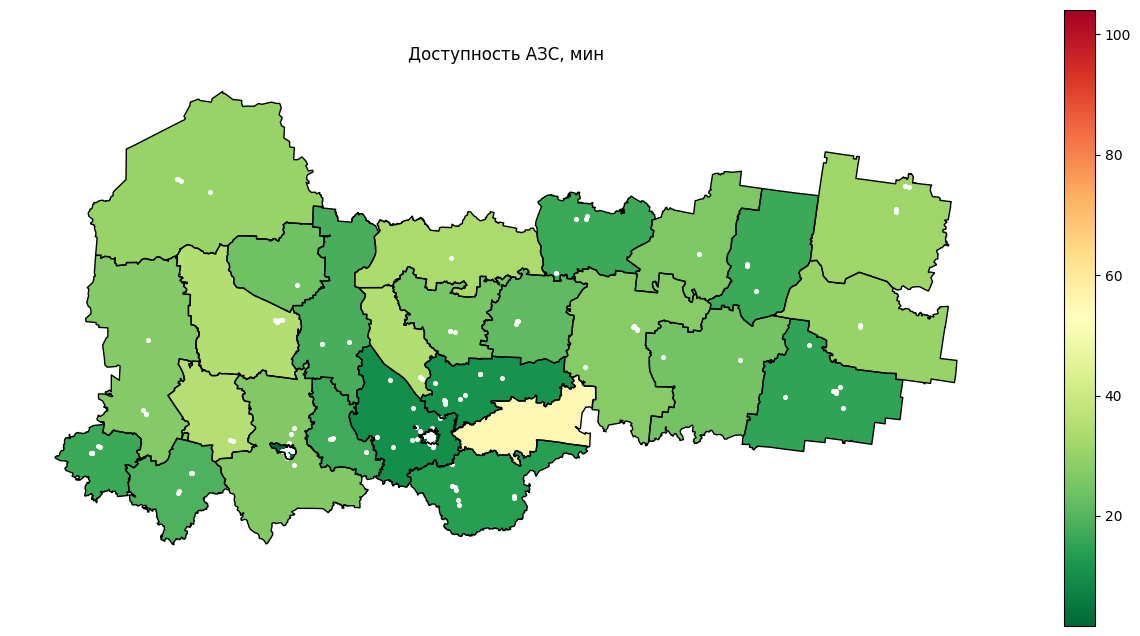

In [52]:
visualize_availability(p,polygons_mo,fuel,title='Доступность АЗС, мин')

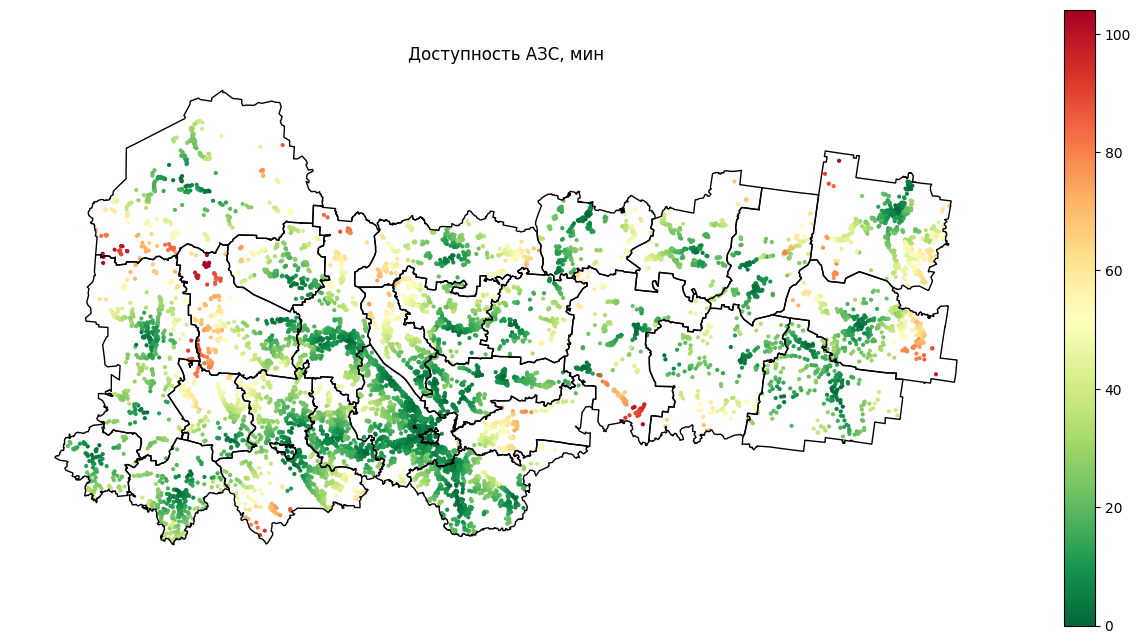

In [53]:
visualize_availability(p,polygons_mo,median=False,title='Доступность АЗС, мин')